In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.3 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
dataset = load_dataset("babelscape/multinerd")


Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

## Training set

In [5]:
# Access the train split for English language
english_train_dataset = dataset["train"].filter(lambda example: example["lang"] == "en")

# Access features for English dataset
english_tokens = english_train_dataset["tokens"]
english_ner_tags = english_train_dataset["ner_tags"]


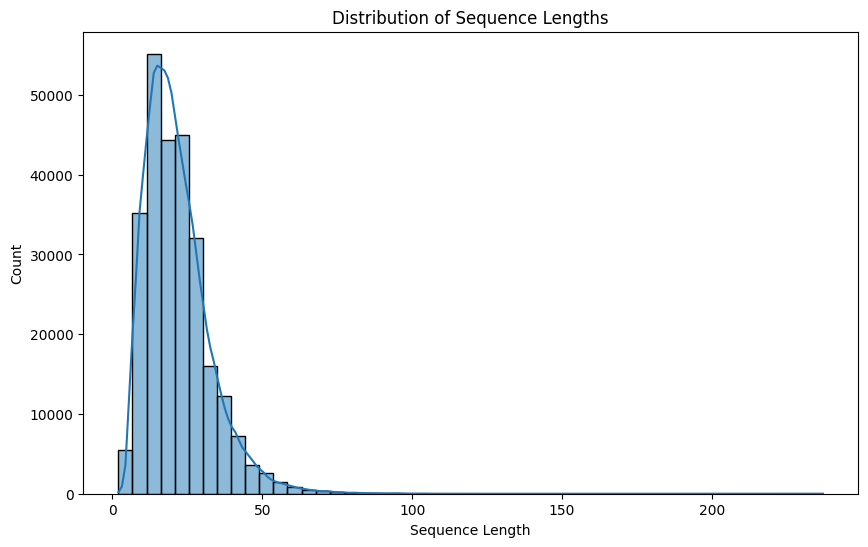

In [6]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of sequence lengths
sequence_lengths = [len(tokens) for tokens in english_tokens]
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=50, kde=True)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.show()



In [7]:
# We are visualize a couple of examples here
for i in range(5):
    print(f"Example {i + 1}:")
    print("Tokens:", english_tokens[i])
    print("NER Tags:", english_ner_tags[i])
    print()

Example 1:
Tokens: ['The', 'type', 'locality', 'is', 'Kīlauea', '.']
NER Tags: [0, 0, 0, 0, 5, 0]

Example 2:
Tokens: ['Common', 'components', 'of', 'the', 'herb', 'layer', 'in', 'bogs', 'includes', 'the', 'carnivorous', 'plants', ':', 'round-leaved', 'sundew', '(', '"', 'Drosera', 'rotundifolia', '"', ')', ',', 'and', 'pitcher', 'plant', '(', '"', 'Sarracenia', 'purpurea', '"', ')', '.']
NER Tags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 26, 0, 0, 0, 0, 0, 0, 0, 0, 25, 26, 0, 0, 0]

Example 3:
Tokens: ['The', 'film', 'starred', 'Tito', 'Lusiardo', 'and', 'a', '19-year', '-', 'old', 'Amelia', 'Bence', '.']
NER Tags: [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0]

Example 4:
Tokens: ['Created', 'by', 'James', 'Cameron', 'and', 'Charles', 'H.', 'Eglee', ',', 'it', 'stars', 'Jessica', 'Alba', 'in', 'her', 'breakthrough', 'role', '.']
NER Tags: [0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]

Example 5:
Tokens: ['The', 'song', 'was', 'written', 'by', 'Sarah', 'Buxton', ',', 

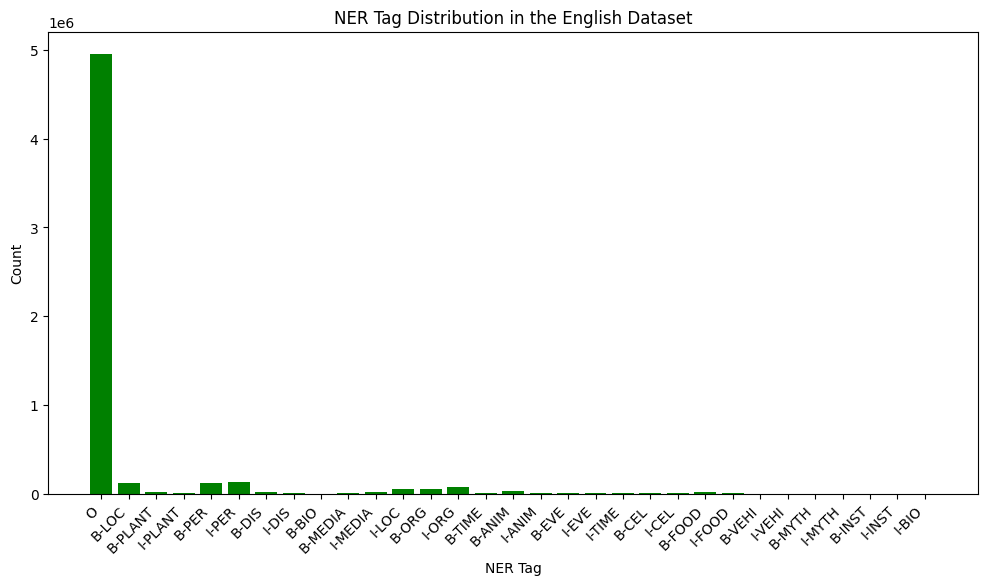

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Tag mapping
tag_mapping = {
    0: "O", 1: "B-PER", 2: "I-PER", 3: "B-ORG", 4: "I-ORG", 5: "B-LOC", 6: "I-LOC",
    7: "B-ANIM", 8: "I-ANIM", 9: "B-BIO", 10: "I-BIO", 11: "B-CEL", 12: "I-CEL",
    13: "B-DIS", 14: "I-DIS", 15: "B-EVE", 16: "I-EVE", 17: "B-FOOD", 18: "I-FOOD",
    19: "B-INST", 20: "I-INST", 21: "B-MEDIA", 22: "I-MEDIA", 23: "B-MYTH", 24: "I-MYTH",
    25: "B-PLANT", 26: "I-PLANT", 27: "B-TIME", 28: "I-TIME", 29: "B-VEHI", 30: "I-VEHI"
}

# Convert indices to tag labels for each example
tag_labels_list = [[tag_mapping[tag] for tag in example] for example in english_ner_tags]

# Flatten the list of tag labels
tag_labels = [tag for sublist in tag_labels_list for tag in sublist]

# Count the occurrences of each tag
tag_counts = Counter(tag_labels)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(tag_counts.keys(), tag_counts.values(), color='green')
plt.xlabel('NER Tag')
plt.ylabel('Count')
plt.title('NER Tag Distribution in the English Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()


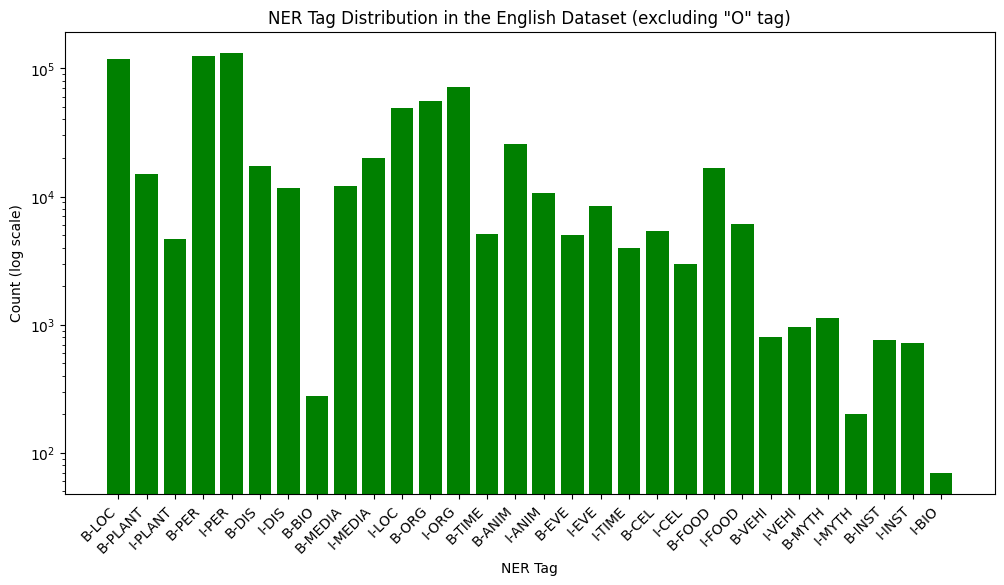

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

# Exclude the "O" tag from visualization
tag_counts.pop("O", None)

# Create a bar plot with a logarithmic scale for the y-axis
plt.figure(figsize=(12, 6))
plt.bar(tag_counts.keys(), tag_counts.values(), color='green')
plt.xlabel('NER Tag')
plt.ylabel('Count (log scale)')
plt.title('NER Tag Distribution in the English Dataset (excluding "O" tag)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
!pip install wordcloud


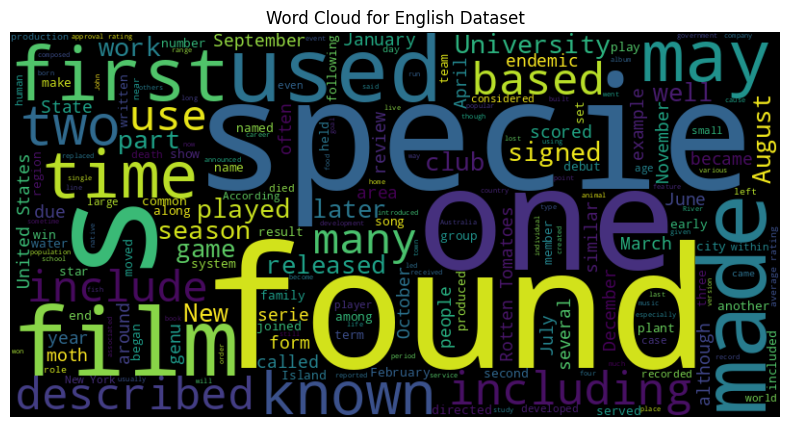

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in the English dataset
all_text = ' '.join([' '.join(tokens) for tokens in english_tokens])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for English Dataset')
plt.show()


In [18]:
!pip install plotly


In [20]:
import plotly.express as px
import pandas as pd
# Convert Counter to a DataFrame for plotly
tag_counts_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count']).reset_index()
tag_counts_df.columns = ['NER Tag', 'Count']

# Create an interactive bar plot
fig = px.bar(tag_counts_df, x='NER Tag', y='Count', color='NER Tag',
             labels={'NER Tag': 'NER Tag', 'Count': 'Count'},
             title='Interactive NER Tag Distribution in the English Dataset')

# Customize the layout
fig.update_layout(xaxis=dict(type='category'), xaxis_title='NER Tag', yaxis_title='Count')

# Show the plot
fig.show()


In [26]:
import plotly.express as px
import pandas as pd
from collections import Counter

# Count the occurrences of each tag
tag_counts = Counter(tag_labels)

# Exclude the "O" tag from the plot
tag_counts.pop("O", None)

# Convert Counter to a DataFrame for plotly
tag_counts_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count']).reset_index()
tag_counts_df.columns = ['NER Tag', 'Count']

# Create an interactive bar plot
fig = px.bar(tag_counts_df, x='NER Tag', y='Count', color='NER Tag',
             labels={'NER Tag': 'NER Tag', 'Count': 'Count'},
             title='Interactive NER Tag Distribution in the English Dataset (excluding "O" tag)')

# Customize the layout
fig.update_layout(xaxis=dict(type='category'), xaxis_title='NER Tag', yaxis_title='Count')

# Show the plot
fig.show()


## Testing and Validation sets

In [27]:
english_train_dataset = dataset["train"].filter(lambda example: example["lang"] == "en")
english_test_dataset = dataset["test"].filter(lambda example: example["lang"] == "en")
english_validation_dataset = dataset["validation"].filter(lambda example: example["lang"] == "en")


Filter:   0%|          | 0/335986 [00:00<?, ? examples/s]

Filter:   0%|          | 0/334800 [00:00<?, ? examples/s]

In [28]:
print(len(english_train_dataset))
print(len(english_test_dataset))
print(len(english_validation_dataset))

262560
32908
32820


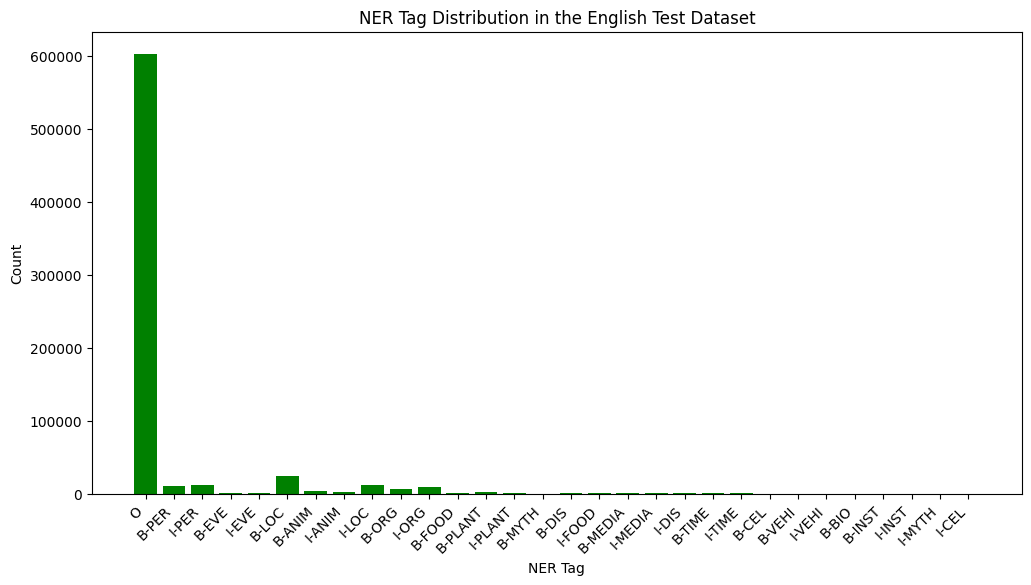

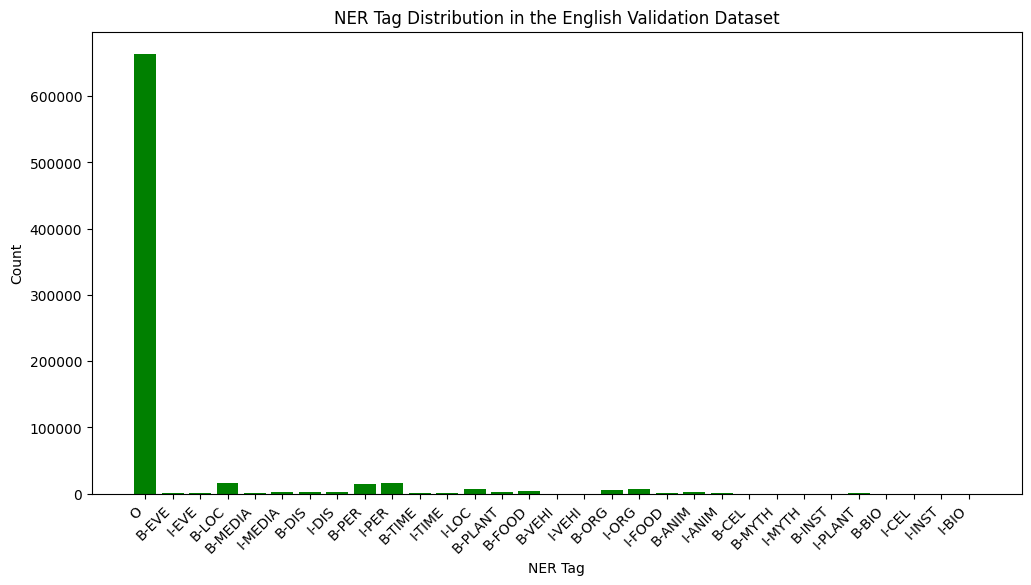

Test set size: 32908
Validation set size: 32820


In [29]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to generate NER tag distribution plot
def plot_ner_distribution(dataset, title):
    # Access NER tags
    ner_tags = dataset["ner_tags"]

    # Convert indices to tag labels for each example
    tag_labels_list = [[tag_mapping[tag] for tag in example] for example in ner_tags]

    # Flatten the list of tag labels
    tag_labels = [tag for sublist in tag_labels_list for tag in sublist]

    # Count the occurrences of each tag
    tag_counts = Counter(tag_labels)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(tag_counts.keys(), tag_counts.values(), color='green')
    plt.xlabel('NER Tag')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot NER tag distribution for the English test dataset
plot_ner_distribution(english_test_dataset, 'NER Tag Distribution in the English Test Dataset')

# Plot NER tag distribution for the English validation dataset
plot_ner_distribution(english_validation_dataset, 'NER Tag Distribution in the English Validation Dataset')

# Print the length of the test and validation sets
print("Test set size:", len(english_test_dataset))
print("Validation set size:", len(english_validation_dataset))


In [30]:
import plotly.express as px
import pandas as pd
from collections import Counter

# Function to generate interactive NER tag distribution plot
def plot_interactive_ner_distribution(dataset, title):
    # Access NER tags
    ner_tags = dataset["ner_tags"]

    # Convert indices to tag labels for each example
    tag_labels_list = [[tag_mapping[tag] for tag in example] for example in ner_tags]

    # Flatten the list of tag labels
    tag_labels = [tag for sublist in tag_labels_list for tag in sublist]

    # Count the occurrences of each tag
    tag_counts = Counter(tag_labels)

    # Exclude the "O" tag from the plot
    tag_counts.pop("O", None)

    # Convert Counter to a DataFrame for plotly
    tag_counts_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count']).reset_index()
    tag_counts_df.columns = ['NER Tag', 'Count']

    # Create an interactive bar plot
    fig = px.bar(tag_counts_df, x='NER Tag', y='Count', color='NER Tag',
                 labels={'NER Tag': 'NER Tag', 'Count': 'Count'},
                 title=title)

    # Customize the layout
    fig.update_layout(xaxis=dict(type='category'), xaxis_title='NER Tag', yaxis_title='Count')

    # Show the plot
    fig.show()

# Plot interactive NER tag distribution for the English test dataset
plot_interactive_ner_distribution(english_test_dataset, 'Interactive NER Tag Distribution in the English Test Dataset (excluding "O" tag)')

# Plot interactive NER tag distribution for the English validation dataset
plot_interactive_ner_distribution(english_validation_dataset, 'Interactive NER Tag Distribution in the English Validation Dataset (excluding "O" tag)')


### compared to the validation and the Training set, the test data has only 30 labels. **Missing 'I-BIO' tag**.